# Lab 02: Empirical Network Analysis

In the last exercise, we have introduced `python` and `igraph` and we have discussed a first example showing how to read and visualise empirical complex networks. This week's exercise will address one of the major applications of network theory: the analysis of complex networks, in particular the identification of important nodes and the detection of communities. In addition to the `gentoo` data set used in the last lab, we will use two additional data sets representing:

i) a collaboration network of the `KDE` Open Source Software community, and 

ii) the power grid of the western states of the USA.

The first two data sets have been collected by myself. The power grid data set is publicly available from http://toreopsahl.com/datasets/. You should have been provided all three files alongside this lab assignment.

Just as in the last lab, we will use our standard pre-amble. Furthermore, we additionally use a helper function to show `pyplot` plots within an `ipython` notebook (as introduced in the tutorial).

In [120]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
import itertools
from IPython.display import *

def displayNetwork(g, visual_style={}):
    igraph.plot(g, "img/temp.png", **visual_style)
    display(Image(filename='img/temp.png'))
    
def displayPlot(plt):
    plt.savefig("img/temp_plot.png")
    display(Image(filename='img/temp_plot.png'))

### Task 1: Diameter, path lengths and components

Your first task will be to analyze the diameter, path lengths and connected components of the three networks. For this, you should first read the three data files. For the first task, make sure to read them as **undirected** networks.

In [33]:
kde = igraph.Graph.Read_Ncol("data/kde_2601_30d.txt", directed=False)
print(kde.summary())
gentoo = igraph.Graph.Read_Ncol("data/gentoo_810_30d.txt", directed=False)
print(gentoo.summary())
pgrid = igraph.Graph.Read_Ncol("data/powergrid.txt", directed=False)
print(pgrid.summary())

IGRAPH UN-- 1039 1232 -- 
+ attr: name (v)
IGRAPH UN-- 405 514 -- 
+ attr: name (v)
IGRAPH UNW- 4941 6594 -- 
+ attr: name (v), weight (e)


You should now extract the largest connected component of these networks. How large is its relative size compared to the total number of nodes? Would you refer to them as **giant** connected components (based on what you have learnt in the lecture)?

In [42]:
kde_lcc = kde.components().subgraphs()[-1]
print("Relative size of LCC in kde is %.5f" % (float(kde_lcc.vcount()) / kde.vcount()) )

gentoo_lcc = gentoo.components().subgraphs()[-1]
print("Relative size of LCC in gentoo is %.5f" % (float(gentoo_lcc.vcount()) / gentoo.vcount()) )

pgrid_lcc = pgrid.components().subgraphs()[-1]
print("Relative size of LCC in pgrid is %.5f" % (float(pgrid_lcc.vcount()) / pgrid.vcount()) )

Relative size of LCC in kde is 1.00000
Relative size of LCC in gentoo is 0.99506
Relative size of LCC in pgrid is 1.00000


Compute the diameter and the average shortest path length using the corresponding `igraph` functions. What differences do you observe between the three networks? Can you explain your observation? 

In [47]:
print("Diameter of pgrid is %d" % pgrid.diameter())
print("Diameter of kde is %d" % kde.diameter())
print("Diameter of gentoo is %d" % gentoo.diameter())

print("Avg. path length of pgrid is %.2f" % pgrid.average_path_length())
print("Avg. path length of kde is %.2f" % kde.average_path_length())
print("Avg. path length of gentoo is %.2f" % gentoo.average_path_length())

Diameter of pgrid is 46
Diameter of kde is 9
Diameter of gentoo is 8
Avg. path length of pgrid is 18.99
Avg. path length of kde is 3.74
Avg. path length of gentoo is 3.11


### Task 2: Node Centralities

Read the data files again, but this time read the `KDE` and `gentoo` files as **directed** network. We will interpret the power grid network as **undirected** network, so you won't have to read it again.

In [48]:
kde = igraph.Graph.Read_Ncol("data/kde_2601_30d.txt", directed=True)
print(kde.summary())
gentoo = igraph.Graph.Read_Ncol("data/gentoo_810_30d.txt", directed=True)
print(gentoo.summary())

IGRAPH DN-- 1039 1232 -- 
+ attr: name (v)
IGRAPH DN-- 405 514 -- 
+ attr: name (v)


For the three networks, compute the following node centralities using the corresponding `igraph` functions: 

i) in- and out-degree (for the directed networks, 

ii) (total) degree, 

iii) closeness and centrality, and  

iv) betweenness centrality.

Identify the names of the most central nodes according to these different centrality measures in each of the three networks.

In [77]:
def top_n(graph, properties, n=3):
    zipped = zip(graph.vs, properties)
    zipped = sorted(zipped, key=lambda x: x[1], reverse=True)

    return list(map(lambda x: "%s: %.2f" % (x[0].attributes()["name"], x[1]), zipped))[0:3]

kde_bw = top_n(kde, kde.betweenness())
kde_cl = top_n(kde, kde.closeness())
kde_indeg = top_n(kde, kde.degree(mode=igraph.IN))
kde_outdeg = top_n(kde, kde.degree(mode=igraph.OUT))

print('Most important nodes (KDE)') 
print('\tbetweenness centrality: ', kde_bw)
print('\tcloseness centrality: ', kde_cl)
print('\tin-degree centrality: ', kde_indeg)
print('\tout-degree centrality: ', kde_outdeg)

gentoo_bw = top_n(gentoo, gentoo.betweenness())
gentoo_cl = top_n(gentoo, gentoo.closeness())
gentoo_indeg = top_n(gentoo, gentoo.degree(mode=igraph.IN))
gentoo_outdeg = top_n(gentoo, gentoo.degree(mode=igraph.OUT))

print('\nMost important nodes (Gentoo)')
print('\tbetweenness centrality: ', gentoo_bw)
print('\tcloseness centrality: ', gentoo_cl)
print('\tin-degree centrality: ', gentoo_indeg)
print('\tout-degree centrality: ', gentoo_outdeg)

pgrid_bw = top_n(pgrid, pgrid.betweenness())
pgrid_cl = top_n(pgrid, pgrid.closeness())
pgrid_deg = top_n(pgrid, pgrid.degree())

print('\nMost important nodes (Power Grid)') 
print('\tbetweenness centrality: ', pgrid_bw)
print('\tcloseness centrality: ', pgrid_bw)
print('\tdegree centrality: ', pgrid_deg)

Most important nodes (KDE)
	betweenness centrality:  ['ervin: 1110.00', 'cgiboudeaux: 1015.50', 'echidnaman: 829.50']
	closeness centrality:  ['andresbajotierra: 0.47', 'kdelibs-bugs: 0.39', 'echidnaman: 0.39']
	in-degree centrality:  ['kdelibs-bugs: 10.00', 'kde: 9.00', 'kwin: 7.00']
	out-degree centrality:  ['andresbajotierra: 416.00', 'cgiboudeaux: 152.00', 'myriam: 87.00']

Most important nodes (Gentoo)
	betweenness centrality:  ['jakub: 1322.33', 'seemant: 813.00', 'exg: 266.00']
	closeness centrality:  ['jakub: 0.28', 'x86: 0.23', 'ppc: 0.23']
	in-degree centrality:  ['amd64: 12.00', 'x86: 12.00', 'ppc: 10.00']
	out-degree centrality:  ['jakub: 237.00', 'vapier: 27.00', 'jaervosz: 21.00']

Most important nodes (Power Grid)
	betweenness centrality:  ['4165: 3518477.34', '2544: 3436528.37', '1244: 3412093.92']
	closeness centrality:  ['4165: 3518477.34', '2544: 3436528.37', '1244: 3412093.92']
	degree centrality:  ['2554: 19.00', '4459: 18.00', '3469: 14.00']


Plot the KDE network. Scale and/or color nodes according to their betweenness centrality. 

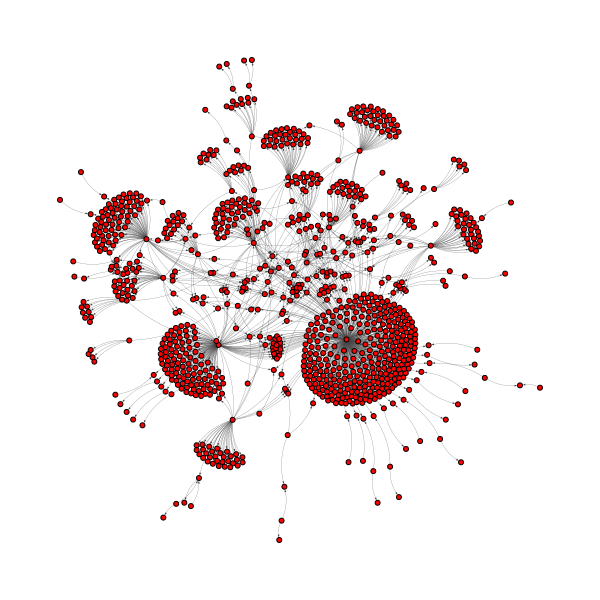

In [81]:
visual_style = {}
visual_style["vertex_color"] = "lightblue"
visual_style["layout"] = "fruchterman_reingold"
visual_style["margin"] = 60
visual_style["edge_curved"] = 0.2
visual_style["edge_width"] = 0.2
visual_style["edge_arrow_size"] = 0.2
visual_style["edge_arrow_width"] = 1
visual_style["vertex_size"] = 5 
visual_style["vertex_color"] = "red"

displayNetwork(kde, visual_style=visual_style)


Using the function `hist` from the `matplotlib` library, plot the histogram of total node degrees for the three networks. What difference do you observe?

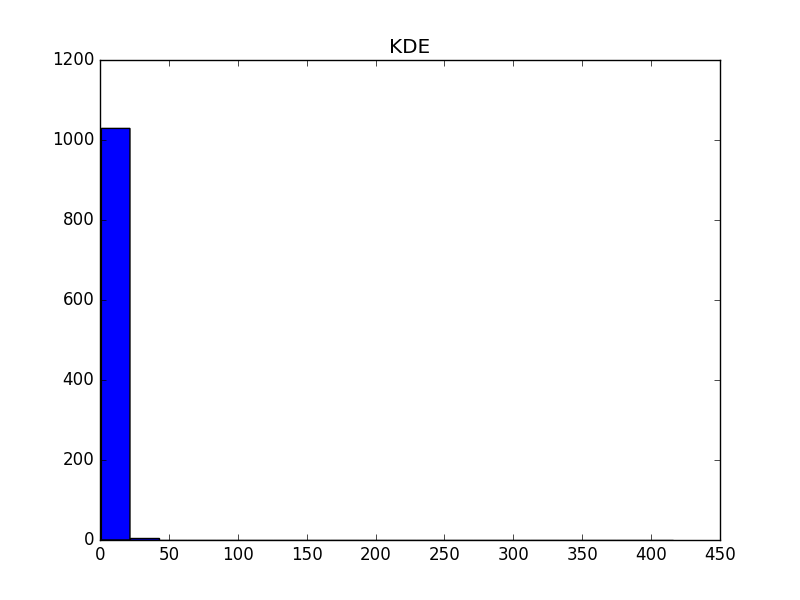

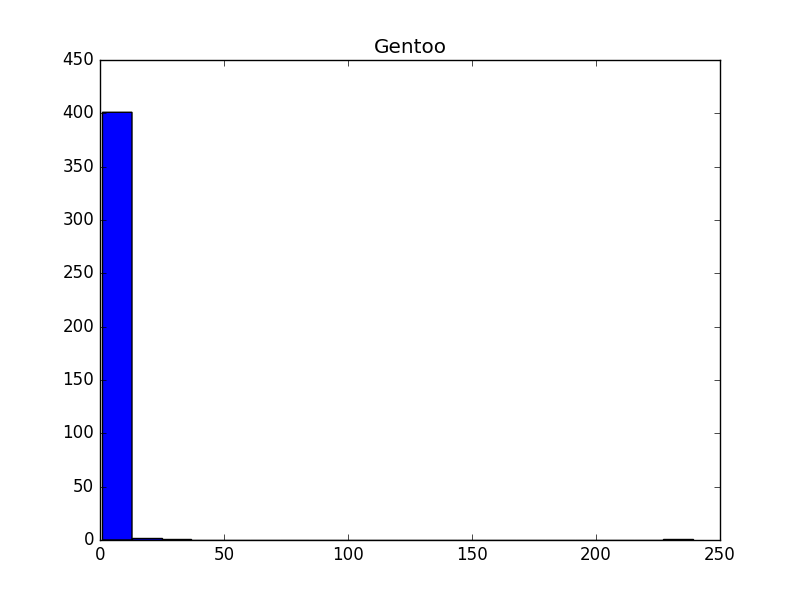

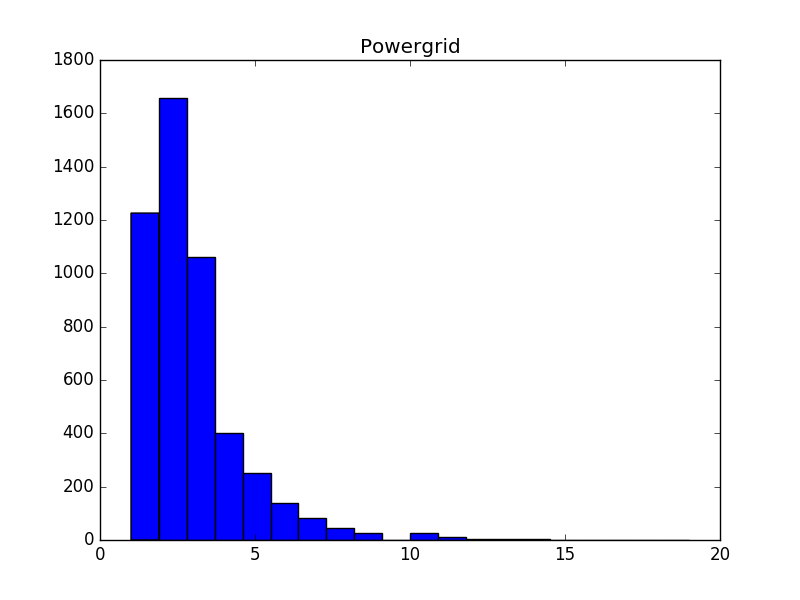

In [95]:
def plot_degree_histogram(graph, title=""):
    dataset = graph.degree(mode=igraph.ALL)
    plt.clf()
    plt.hist(dataset, 20)
    plt.title(title)
    displayPlot(plt)
    
plot_degree_histogram(kde, "KDE")
plot_degree_histogram(gentoo, "Gentoo")
plot_degree_histogram(pgrid, "Powergrid")

### Task 3: Modularity and community detection

In the final task, we investigate basic methods to detect and analyse community structures in `igraph`. First of all, you should review the documentation of `igraph` and search for the different **community detection** algorithms mentioned in the lecture. Typically the corresponding functions in `igraph` are prefixed with the word `community`. For this introductory task, it will be sufficient to use the simple greedy algorithm `community_fastgreedy`.

Let us first create a simple **synthetic network** with strong community structures as follows: 

First generate two networks $c1$ and $c2$ with $50$ nodes each and add $200$ links at random to each of the networks. Using `igraph`'s $+$-operator combine the two networks to a single network $g$. Finally, add $10$ random links to $g$ that interconnect nodes in the two communities $c1$ and $c2$.

In [167]:
def random_net(num_vertices=50, num_edges=200):
    g = igraph.Graph()
    g.add_vertices(num_vertices)
    
    potential_edges = list(itertools.product(range(0, num_vertices), range(0, num_vertices)))
    chosen_edge_indices = np.random.choice(range(0, len(potential_edges)), size=num_edges, replace=False)
    
    for i in chosen_edge_indices:
        edge = potential_edges[i]
        g.add_edge(edge[0], edge[1])

    return g
    
c1 = random_net()
c2 = random_net()

g = c1 + c2
g.summary()

# Adding edges
nodes1 = np.random.choice(range(0, 50), size=(10), replace=False)
nodes2 = np.random.choice(range(50, 100), size=(10))
edges = zip(nodes1, nodes2)
g.add_edges(edges)

g.summary()

'IGRAPH U--- 100 410 -- '

Use `igraph`'s `community_fastgreedy` method to detect communities in your example network. Output the modularity $Q_{opt}$ value obtained for your network and plot the communities by invoking the `displayNetwork` function on the community partition returned by the algorithm.

Modularity: 0.473
Dendrogram, 100 elements, 99 merges


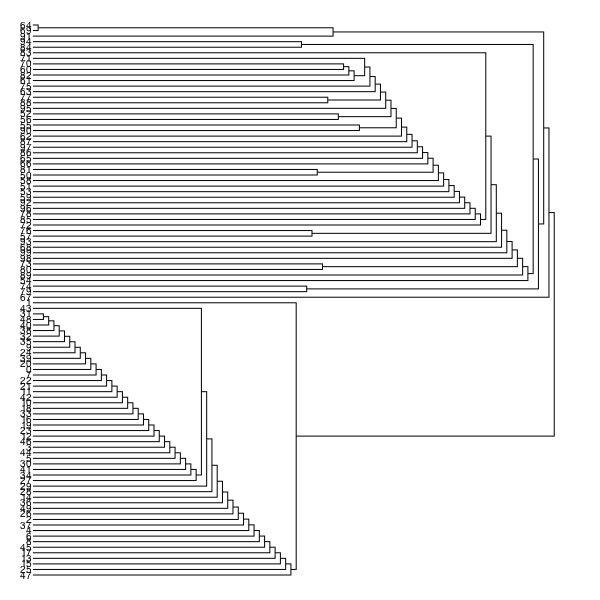

In [168]:
g.simplify()
fg = g.community_fastgreedy()
print("Modularity: %.3f" % g.modularity(fg.as_clustering()))

print(fg)
displayNetwork(fg)

Using the definition from lecture 2, implement a function in that computes the theoretical maximum modularity $Q_{max}$ of a network. The function's signature should look like $Q_{max}(g, c)$, where $g$ is a given undirected network and $c$ is a community membership vector, i.e., a vector with $c[i]=k$ if node $i$ is member of community $k$. Run your function on the sample network. Use the returned value to compute the *community assortativity coefficient* $\frac{Q_{opt}}{Q_{max}}$.

In [169]:
def Qmax(g, memberships):
    ...

Qm = Qmax(max_mod, communities.as_clustering().membership)
print("Community assortativity coefficient for sample = ", Q/Qm)

NameError: name 'max_mod' is not defined

Use your function to compute the community assortativity coefficients for the three empirical networks from task 1 and 2. For this, you should read the data again as undirected networks.

In [ ]:
... 
print("Community assortativity coefficient for kde = ", Q/Qm)

...
print("Community assortativity coefficient for gentoo = ", Q/Qm)

... 
print("Community assortativity coefficient for pgrid = ", Q/Qm)